In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm

In [3]:
df = pd.read_csv("./Month_Value_1.csv")
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [4]:
# Data preparation - convert 'Period' to datetime and set as index
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')
df = df.set_index('Period')

# Drop NaN values for analysis
df = df.dropna()

In [5]:
ts_df = df['Sales_quantity']

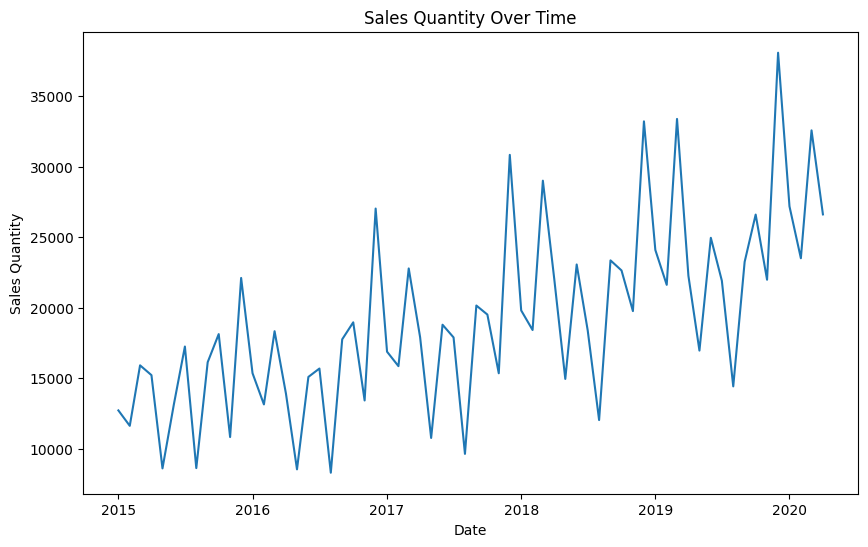

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(ts_df)
plt.title('Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.show()

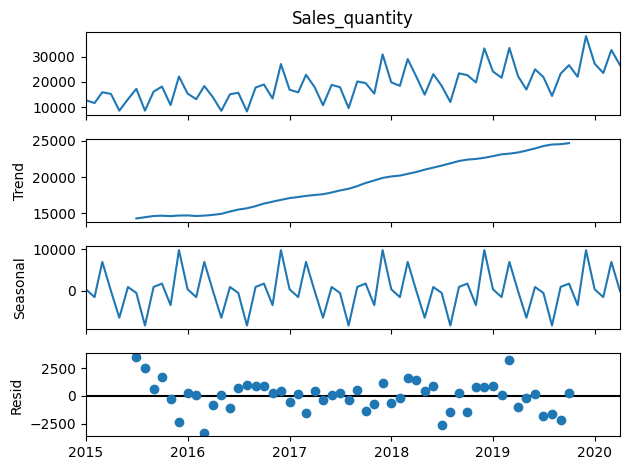

In [8]:
decompose = seasonal_decompose(ts_df, model='additive', period=12)
decompose.plot()
plt.show()

In [10]:
result = adfuller(ts_df)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: 1.157056206094537
p-value: 0.9956753282590142
The time series is non-stationary.
